In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import tire
import car
from scipy.optimize import newton
con = 180/np.pi

In [2]:
params = {
    'W_uf' : 111,    #Front unsprung weight (N)
    'W_ur' : 111,    #Rear unsprung weight  (N)
    'W_s'  : 2446,   #Sprung weight         (N)
    # CG locations
    'z_wf' : 0.21,   #Front unsprung height (m)
    'z_wr' : 0.21,   #Rear unsprung height  (m)
    'h_s'  : 0.23,   #Sprung height         (m)
    'a_s'  : 0.76,   #Sprung distance from front axle (m)
    # Car geometry
    'l'    : 1.524,  #Wheelbase   (m)
    't_f'  : 1.22,   #Front track (m)
    't_r'  : 1.22,   #Rear track  (m)
    # Roll center heights
    'z_rf' : 0.038,  #Front roll center height (m)
    'z_rr' : 0.076,  #Rear roll center height  (m)
    # Roll rates
    'K_f'  : 0.0e3, #Front roll rate (N-m/rad)
    'K_r'  : 48.0e3, #Rear roll rate  (N-m/rad)
    # Steering
    'ack'  : 0.0,    #Steering Ackerman (%)
    'toe_f': 0.5,   #Front toe (deg)
    'toe_r': 1.0,    #Rear toe  (deg)
    'tire' : tire.Hoosier10X7()
}
C = car.Car(params)

Roll axis inclination: 1.43 deg
Unsprung CG height from roll axis: 0.17 m
Roll sensitivity: -0.51 deg/g
Front lateral weight transfer: 55.75 N/g
Rear lateral weight transfer:  443.48 N/g
Longitudinal weight transfer:       399.74 N/g
Front static wheel load:            -668.60 N
Rear static wheel load:             -665.40 N
Total weight:     -2668.00 N


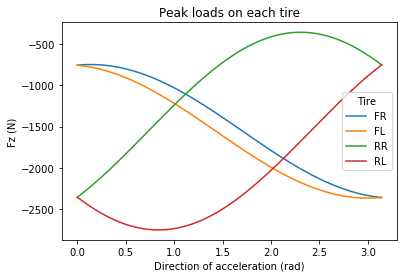

Maximum front tire load: -2364.82 N
Maximum rear tire load:  -2748.49 N


In [3]:
# Assume 1g of downforce and look at all possible acceleration directions
# Also assume worst case of roll stiffness all only on rear
N = 1000
theta = np.linspace(0, np.pi, N)
Ax = 2*np.cos(theta)
Ay = 2*np.sin(theta)
load = np.zeros(N, dtype=[('fr', 'double'), ('fl', 'double'), ('rr', 'double'), ('rl', 'double')])
for i in range(N):
    load[i] = C.load_from_A(Ax[i], Ay[i])
    for j in range(4):
        Waero = C.W/4
        WDyn = -C.W_uf - C.W_ur #Assume 4g peak acceleration of the wheels
        load[i][j] += Waero + WDyn
plt.plot(theta, load[:]['fr'], theta, load[:]['fl'], theta, load[:]['rr'], theta, load[:]['rl'])
plt.title('Peak loads on each tire')
plt.xlabel('Direction of acceleration (rad)')
plt.ylabel('Fz (N)')
plt.legend(['FR', 'FL', 'RR', 'RL'], title='Tire')
plt.show()
print('Maximum front tire load: %0.2f N' % (np.amin(load[:]['fl'])))
print('Maximum rear tire load:  %0.2f N' % (np.amin(load[:]['rl'])))

Roll axis inclination: 1.43 deg
Unsprung CG height from roll axis: 0.17 m
Roll sensitivity: -0.51 deg/g
Front lateral weight transfer: 405.68 N/g
Rear lateral weight transfer:  93.56 N/g
Longitudinal weight transfer:       399.74 N/g
Front static wheel load:            -668.60 N
Rear static wheel load:             -665.40 N
Total weight:     -2668.00 N


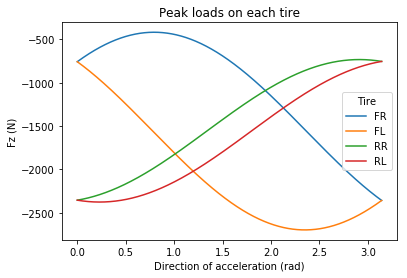

Maximum front tire load: -2696.67 N
Maximum rear tire load:  -2375.47 N


In [4]:
# Assume worst case of roll stiffness all only on front
params['K_f'] = 48.0e3
params['K_r'] = 0.0e3
C = car.Car(params)
for i in range(N):
    load[i] = C.load_from_A(Ax[i], Ay[i])
    for j in range(4):
        Waero = C.W/4
        WDyn = -C.W_uf - C.W_ur #Assume 4g peak acceleration of the wheels
        load[i][j] += Waero + WDyn
plt.plot(theta, load[:]['fr'], theta, load[:]['fl'], theta, load[:]['rr'], theta, load[:]['rl'])
plt.title('Peak loads on each tire')
plt.xlabel('Direction of acceleration (rad)')
plt.ylabel('Fz (N)')
plt.legend(['FR', 'FL', 'RR', 'RL'], title='Tire')
plt.show()
print('Maximum front tire load: %0.2f N' % (np.amin(load[:]['fl'])))
print('Maximum rear tire load:  %0.2f N' % (np.amin(load[:]['rl'])))

In [5]:
# Assume peak vertical tire forces of 2750N on the laden wheel tires
# From this we can get the peak lateral and longitudinal force
loadM = -2750
mux = C.tire.get_mux(loadM)
muy = C.tire.get_muy(loadM)
Fx = mux*loadM*0.65
Fy = -muy*loadM*0.65
Mx = 0.85*muy*6e-2*loadM*0.65
Mz = 0.5*muy*7.438e-2*loadM*0.65
print('Peak longitudinal force: %0.2f N' % Fx)
print('Peak lateral force: %0.2f N' % Fy)
print('Peak overturning torque: %0.2f Nm' % Mx)
print('Peak aligning torque: %0.2f Nm' % Mz)

Peak longitudinal force: -5136.76 N
Peak lateral force: 2329.87 N
Peak overturning torque: -118.82 Nm
Peak aligning torque: -86.65 Nm


In [6]:
# The largest load the unlaiden wheel might have is -1000
# From this we can get the peak lateral and longitudinal force
loadM = -1000
mux = C.tire.get_mux(loadM)
muy = C.tire.get_muy(loadM)
Fx = mux*loadM*0.65
Fy = muy*loadM*0.65
Mx = -0.85*muy*6e-2*loadM*0.65
Mz = -0.5*muy*7.438e-2*loadM*0.65
print('Peak longitudinal force: %0.2f N' % Fx)
print('Peak lateral force: %0.2f N' % Fy)
print('Peak overturning torque: %0.2f Nm' % Mx)
print('Peak aligning torque: %0.2f Nm' % Mz)

Peak longitudinal force: -1990.26 N
Peak lateral force: -1708.66 N
Peak overturning torque: 87.14 Nm
Peak aligning torque: 63.54 Nm
